In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [4]:
train = pd.read_csv('./data/train.csv', index_col=0)
test = pd.read_csv('./data/test.csv', index_col=0)

In [5]:
train.dropna(inplace=True)

train_X = train.drop(['Is.Back', 'Customer.ID'], axis=1)
test_X = test.drop(['Is.Back', 'Customer.ID'], axis=1)
train_Y = train[['Is.Back']]
test_Y = test[['Is.Back']]

In [6]:
train_X['Date'] = pd.to_datetime(train_X['Date'])
train_X['year'] = train_X['Date'].dt.year
train_X['month'] = train_X['Date'].dt.month
train_X['day'] = train_X['Date'].dt.day
train_X = train_X.drop('Date', axis=1)

test_X['Date'] = pd.to_datetime(test_X['Date'])
test_X['year'] = test_X['Date'].dt.year
test_X['month'] = test_X['Date'].dt.month
test_X['day'] = test_X['Date'].dt.day
test_X = test_X.drop('Date', axis=1)

from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore', sparse=False)
train_X = pd.DataFrame(enc.fit_transform(train_X))
test_X = pd.DataFrame(enc.transform(test_X))

In [7]:
from sklearn.neighbors import KNeighborsClassifier

In [8]:
knn = KNeighborsClassifier(algorithm='kd_tree')

In [9]:
knn.fit(train_X, train_Y)

/home/eta/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """Entry point for launching an IPython kernel.


KNeighborsClassifier(algorithm='kd_tree', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [10]:
train_error = (knn.predict(train_X).reshape(-1,1) == train_Y).sum() / len(train_Y)
test_error = (knn.predict(test_X).reshape(-1,1) == test_Y).sum() / len(test_Y)

In [9]:
[train_error, test_error]

[Is.Back    0.987711
 dtype: float64, Is.Back    0.705543
 dtype: float64]

<h1> Hyper Parameters Tuning </h1>

In [10]:
train_errors = []
cnt = 0
test_errors = []
for estimators in range(20, 100, 20):
    dt = RandomForestClassifier(max_depth=100, n_estimators=estimators)
    dt.fit(train_X, train_Y)
    train_error = (dt.predict(train_X).reshape(-1,1) == train_Y).sum() / len(train_Y)
    test_error = (dt.predict(test_X).reshape(-1,1) == test_Y).sum() / len(test_Y)
    train_errors.append(train_error)
    test_errors.append(test_error)
    cnt = cnt + 1
    print('\r {} %'.format(int((cnt / len(range(20, 100, 20))) * 100)), end='')
    

/home/eta/.local/lib/python3.6/site-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


 25 %

/home/eta/.local/lib/python3.6/site-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


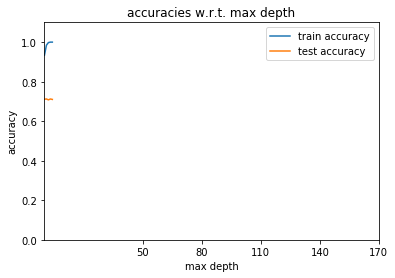

In [29]:
plt.title('accuracies w.r.t. max depth')
plt.xlabel('max depth')
plt.ylabel('accuracy')
plt.plot(train_errors, label='train accuracy')
plt.plot(test_errors, label='test accuracy')
plt.xticks(list(range(50, 200, 30)))
plt.ylim(0,1.1)
plt.legend()

In [ ]:
len(train_errors)